1. business derivation / business problem / requirements gathering
2. data pipelines
    - read
    - definition
    - validation
    - defense
    - splitting --> train / test / valid
    - serialization
3. EDA
4. preprocessing
    - split numeric dan categorical
    - join again after preprocessing
5. modeling
    - baseline
    - vanilla
    - many model
    - hyperparameter tuning
    - evaluation
6. API (optional)

per proses disimpen `.pkl` nya

### Business Derivation
---

- case: house pricing
- problem: 
    - ingin memprediksi harga rumah berdasarkan fitur - fitur yang dimiliki dari masing - masing rumah
- solution:
    - traditional approach: manual if else sampe mampus
    - ml approach:
        - baseline model: harga rata - rata dari target
        - vanilla model: linear regression
        - multiple model + hyperparams

- metrics:
    - business: ????
    - ml model: ????


### Data Pipeline
---

source: `house_price.csv`

proses:
- get data from sources, savve it to `.pkl`
- definition
- validation: check data types
- defense
- split into X, y, save it to `pkl`
- split into train, test, valid then save it to `pkl`

In [77]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import joblib
import os
import yaml

##### Read data from sources
---

In [78]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [166]:
params = load_params("config/params.yaml")

params

{'dataset_filename': 'house_price.csv',
 'dataset_dump_path': {'raw': 'data/raw/',
  'interim': 'data/interim/',
  'processed': 'data/processed/'},
 'target_col': 'price',
 'int64_columns': ['price',
  'area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking'],
 'object_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 'value_status': ['yes', 'no'],
 'value_furnish_status': ['furnished', 'semi-furnished', 'unfurnished'],
 'label_encoder_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea'],
 'ohe_columns': ['furnishingstatus'],
 'feature_num_columns': ['area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking']}

In [80]:
params["dataset_dump_path"]['raw'] + "raw_data.pkl"

'data/raw/raw_data.pkl'

In [81]:
def read_data(filename: str) -> pd.DataFrame:
    data = pd.read_csv(filename)
    
    print(f"Data shape: {data.shape}")
    
    dump_path = params["dataset_dump_path"]["raw"] + "raw_data.pkl"
    joblib.dump(data, dump_path)
    
    return data
    

In [82]:
df_house_price = read_data(filename = params["dataset_filename"])

df_house_price

Data shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##### Data Definition
---

- `price`: harga dari rumah yang dijual
- `area`: luas area rumah dalam skala ???
- `bedrooms`: jumlah kamar tidur dari rumah
- `bathrooms`: jumlah kamar mandi dari rumah
- `stories`: rumah berapa lantai
- `mainroad`: apakah rumah di jalan utama atau tidak
- `guestroom`: apakah rumah memiliki kamar untuk tamu
- `basement`: apakah rumah memiliki basement atau tidak
- `hotwaterheating`: apakah rumah ada air panas atau tidak
- `airconditioning`: apakah rumah ada AC atau tidak
- `parking`: kapasitas parkir rumah
- `prefarea`: apakah rumah masuk daerah prefecture atau tidak???
- `furnishingstatus`: status rumah sudah difurnish, semi, atau tidak

##### Data Validation
---

In [83]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
df_house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [85]:
df_house_price.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

##### Data Defense
---

In [86]:
df_house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [87]:
def data_defense_checker(input_data: pd.DataFrame, params: dict) -> None:    
    try:
        print("===== Start Data Defense Checker =====")
        # check data types
        assert input_data.select_dtypes("object").columns.to_list() == params["object_columns"], "an error occurs in object columns"
        assert input_data.select_dtypes("int").columns.to_list() == params["int64_columns"], "an error occurs in integer columns"
        
        # check values
        assert set(input_data.mainroad).issubset(set(params["value_status"])), "an error occurs on mainroad column"
        assert set(input_data.guestroom).issubset(set(params["value_status"])), "an error occurs on guestroom column"
        assert set(input_data.basement).issubset(set(params["value_status"])), "an error occurs on basement column"
        assert set(input_data.hotwaterheating).issubset(set(params["value_status"])), "an error occurs on hotwaterheating column"
        assert set(input_data.airconditioning).issubset(set(params["value_status"])), "an error occurs on airconditioning column"
        assert set(input_data.prefarea).issubset(set(params["value_status"])), "an error occurs on prefarea column"
        assert set(input_data.furnishingstatus).issubset(set(params["value_furnish_status"])), "an error occurs on furnishingstatus column"
    
    except Exception:
        raise Exception("Failed Data Defense Checker")
    
    finally:
        print("===== Finish Data Defense Checker =====")

In [88]:
data_defense_checker(input_data = df_house_price,
                     params = params)

===== Start Data Defense Checker =====
===== Finish Data Defense Checker =====


##### Split to X, y
---

In [89]:
params

{'dataset_filename': 'house_price.csv',
 'dataset_dump_path': {'raw': 'data/raw/',
  'interim': 'data/interim/',
  'processed': 'data/processed/'},
 'target_col': 'price',
 'int64_columns': ['price',
  'area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking'],
 'object_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 'value_status': ['yes', 'no'],
 'value_furnish_status': ['furnished', 'semi-furnished', 'unfurnished'],
 'label_encoder_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea'],
 'ohe_columns': ['furnishingstatus']}

In [90]:
target_col = params["target_col"]

# set target col
y = df_house_price[target_col]

X = df_house_price.drop(columns = target_col, axis = 1)

# validation
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    # stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 42)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                    # stratify = y_test,
                                                    test_size = 0.2,
                                                    random_state = 42)

Features shape: (545, 12)
Target shape: (545,)


In [121]:
def split_data(data: pd.DataFrame, params: dict) -> None:
    # set params
    data_dump_raw = params["dataset_dump_path"]["raw"]
    data_dump_interim = params["dataset_dump_path"]["interim"]

    target_col = params["target_col"]
    
    # set target col
    y = data[target_col]
    
    X = data.drop(columns = target_col, axis = 1)
    
    # validation
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    
    # save the X, y to pkl
    joblib.dump(X, data_dump_raw + "X.pkl")
    joblib.dump(y, data_dump_raw + "y.pkl")
    
    # split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        # stratify = y,
                                                        test_size = 0.2,
                                                        random_state = 42)
    
    X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,
                                                        # stratify = y_test,
                                                        test_size = 0.2,
                                                        random_state = 42)
    
    # Validasi
    print('X_train shape :', X_train.shape)
    print('y_train shape :', y_train.shape)
    print('X_valid shape  :', X_valid.shape)
    print('y_valid shape  :', y_valid.shape)
    print('X_test shape  :', X_test.shape)
    print('y_test shape  :', y_test.shape)    
    
    # dump
    joblib.dump(X_train, data_dump_interim + "X_train.pkl")
    joblib.dump(y_train, data_dump_interim + "y_train.pkl")
    joblib.dump(X_valid, data_dump_interim + "X_valid.pkl")
    joblib.dump(y_valid, data_dump_interim + "y_valid.pkl")
    joblib.dump(X_test, data_dump_interim + "X_test.pkl")
    joblib.dump(y_test, data_dump_interim + "y_test.pkl")

In [122]:
split_data(data = df_house_price, 
           params = params)

Features shape: (545, 12)
Target shape: (545,)
X_train shape : (436, 12)
y_train shape : (436,)
X_valid shape  : (87, 12)
y_valid shape  : (87,)
X_test shape  : (22, 12)
y_test shape  : (22,)


### EDA
---

In [123]:
import seaborn as sns

In [126]:
_df_house_price = df_house_price.copy()

<Axes: xlabel='area', ylabel='Count'>

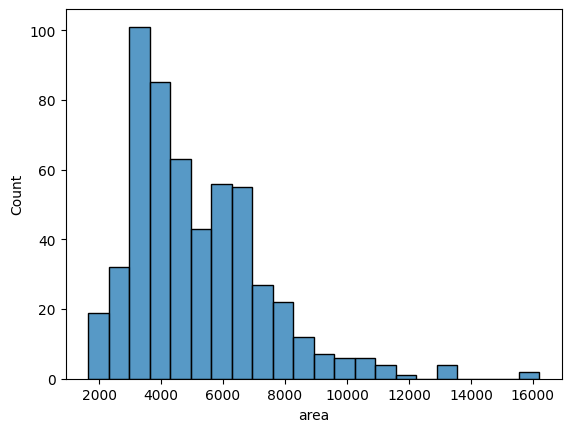

In [127]:
sns.histplot(data = _df_house_price, x = "area")

<Axes: xlabel='price', ylabel='Count'>

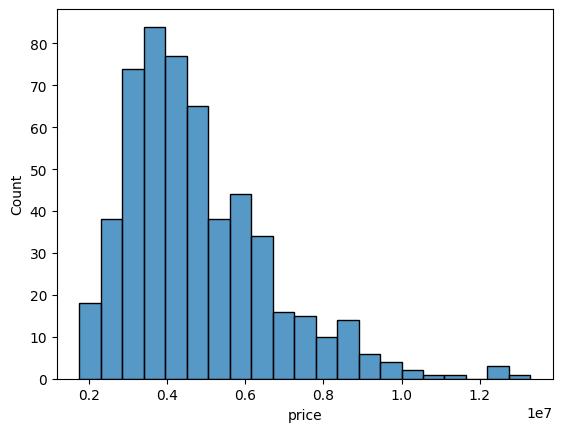

In [128]:
sns.histplot(data = _df_house_price, x = "price")

<Axes: xlabel='furnishingstatus', ylabel='Count'>

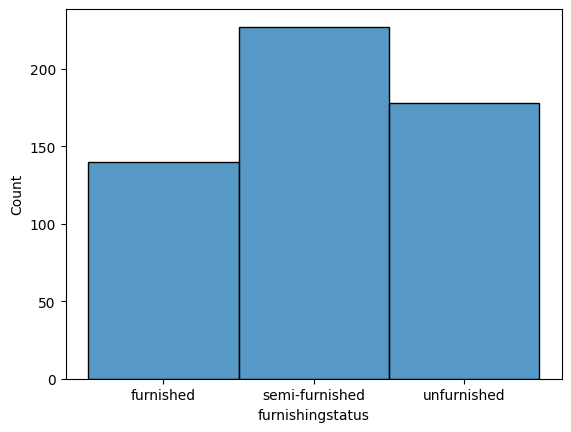

In [129]:
sns.histplot(data = _df_house_price, x = "furnishingstatus")

### Preprocessing & Feature Engineering
---

- udah di split X dan y terus train, test, valid. jadiin satu data tersendiri
- split jadi categorical dan numeric
- untuk numeric mungkin preprocessing nya xxx
- untuk categorical yang value nya binary di LE selain itu di OHE. simpen pkl nya
- join jadi satu lagi dan simpan jadi pkl yg udah di processed biar ready to modeling

In [130]:
params

{'dataset_filename': 'house_price.csv',
 'dataset_dump_path': {'raw': 'data/raw/',
  'interim': 'data/interim/',
  'processed': 'data/processed/'},
 'target_col': 'price',
 'int64_columns': ['price',
  'area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking'],
 'object_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 'value_status': ['yes', 'no'],
 'value_furnish_status': ['furnished', 'semi-furnished', 'unfurnished'],
 'label_encoder_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea'],
 'ohe_columns': ['furnishingstatus']}

load the data again

In [131]:
DATA_INTERIM_PATH = params["dataset_dump_path"]["interim"]

DATA_INTERIM_PATH

'data/interim/'

In [170]:
X_train = joblib.load(DATA_INTERIM_PATH + "X_train.pkl")
y_train = joblib.load(DATA_INTERIM_PATH + "y_train.pkl")

X_test = joblib.load(DATA_INTERIM_PATH + "X_test.pkl")
y_test = joblib.load(DATA_INTERIM_PATH + "y_test.pkl")

X_valid = joblib.load(DATA_INTERIM_PATH + "X_valid.pkl")
y_valid = joblib.load(DATA_INTERIM_PATH + "y_valid.pkl")

##### Split to numeric and categorical
---

In [172]:
def split_num_cat(data: pd.DataFrame, params: dict) -> tuple[pd.DataFrame, pd.DataFrame]:
    # get cat data
    data_cat = data[params["object_columns"]].copy()
    
    # get num data
    data_num = data[params["feature_num_columns"]].copy()
    
    return data_cat, data_num

In [173]:
X_train_cat, X_train_num = split_num_cat(data = X_train, params = params)
X_test_cat, X_test_num = split_num_cat(data = X_test, params = params)
X_valid_cat, X_valid_num = split_num_cat(data = X_valid, params = params)

##### Treat Categorical data
---

using LE dan OHE

In [176]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [177]:
# Step 1: Initialize the OneHotEncoder
ohe = OneHotEncoder(categories = [params["value_furnish_status"]], sparse_output=False)

ohe

OneHotEncoder(categories=[['furnished', 'semi-furnished', 'unfurnished']],
              sparse_output=False)

In [178]:
# Step 2: Fit the encoder on the training data
ohe.fit(X_train_cat[['furnishingstatus']])  # Only fit on the train dataset

OneHotEncoder(categories=[['furnished', 'semi-furnished', 'unfurnished']],
              sparse_output=False)

In [179]:
joblib.dump(ohe, params["dataset_dump_path"]["processed"] + "ohe_fix.pkl")

['data/processed/ohe_fix.pkl']

In [180]:
def preprocess_ohe(data: pd.DataFrame, ohe) -> pd.DataFrame:
    ohe_feat = ohe.transform(data[["furnishingstatus"]])
    
    # create dataframe
    ohe_cols = ohe.categories_[0]
    ohe_df = pd.DataFrame(ohe_feat, columns = ohe_cols, index = data.index)
    
    final_df = pd.concat([data, ohe_df], axis = 1)

    final_df = final_df.drop(columns = ["furnishingstatus"])
    
    return final_df

In [181]:
X_train_cat_ohe = preprocess_ohe(data = X_train_cat, ohe = ohe)
X_test_cat_ohe = preprocess_ohe(data = X_test_cat, ohe = ohe)
X_valid_cat_ohe = preprocess_ohe(data = X_valid_cat, ohe = ohe)

Custom mapping "label encoder"

In [182]:
params

{'dataset_filename': 'house_price.csv',
 'dataset_dump_path': {'raw': 'data/raw/',
  'interim': 'data/interim/',
  'processed': 'data/processed/'},
 'target_col': 'price',
 'int64_columns': ['price',
  'area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking'],
 'object_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 'value_status': ['yes', 'no'],
 'value_furnish_status': ['furnished', 'semi-furnished', 'unfurnished'],
 'label_encoder_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea'],
 'ohe_columns': ['furnishingstatus'],
 'feature_num_columns': ['area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking']}

In [184]:
def custom_label_encoder(data: pd.DataFrame, params: dict) -> pd.DataFrame:
    MAPPER_VALUE = {
        "no": 0,
        "yes": 1
    }
    
    for col in params["label_encoder_columns"]:
        data[col] = data[col].replace(MAPPER_VALUE)
        
    return data

In [185]:
X_train_cat_le = custom_label_encoder(data = X_train_cat_ohe, params = params)
X_test_cat_le = custom_label_encoder(data = X_test_cat_ohe, params = params)
X_valid_cat_le = custom_label_encoder(data = X_valid_cat_ohe, params = params)

Merge it into one for categorical and numerical data

In [186]:
X_train_final = pd.concat([X_train_cat_le, X_train_num], axis = 1)
X_test_final = pd.concat([X_test_cat_le, X_test_num], axis = 1)
X_valid_final = pd.concat([X_valid_cat_le, X_valid_num], axis = 1)

In [190]:
DATASET_PROCESSED_PATH = params["dataset_dump_path"]["processed"]

In [192]:
joblib.dump(X_train_final, DATASET_PROCESSED_PATH + "X_train_final.pkl")
joblib.dump(y_train, DATASET_PROCESSED_PATH + "y_train_final.pkl")

joblib.dump(X_test_final, DATASET_PROCESSED_PATH + "X_test_final.pkl")
joblib.dump(y_test, DATASET_PROCESSED_PATH + "y_test_final.pkl")

joblib.dump(X_valid_final, DATASET_PROCESSED_PATH + "X_valid_final.pkl")
joblib.dump(y_valid, DATASET_PROCESSED_PATH + "y_valid_final.pkl")

['data/processed/y_valid_final.pkl']

### Modeling
---

strategy:
- baseline --> mean
- vanilla model --> linreg
- many model
- many model + tuning


metrics:
- r2 score
- MSE


flow nya training --> pred pake valid --> get best params --> best models pred using test data

In [195]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Baseline model

In [196]:
dummy_regr = DummyRegressor(strategy = "mean")

dummy_regr

DummyRegressor()

In [200]:
dummy_regr.fit(X_train_final, y_train)

DummyRegressor()

In [213]:
y_pred_dummy = dummy_regr.predict(X_valid_final)

y_pred_dummy

array([4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4706527.3853211, 4706527.3853211, 4706527.3853211,
       4706527.3853211, 4

In [214]:
print(f"MSE: {mean_squared_error(y_valid, y_pred_dummy)}")
print(f"R2: {r2_score(y_valid, y_pred_dummy)}")


MSE: 5163375584382.771
R2: -0.01746495509454471


Linear Regression Model

In [215]:
linreg = LinearRegression()

linreg

LinearRegression()

In [220]:
linreg.fit(X_train_final, y_train)

LinearRegression()

In [227]:
y_pred_linreg = linreg.predict(X_valid_final)

y_pred_linreg

array([4662380.98564303, 3220790.84680259, 2730836.19518452,
       3315105.90747801, 4037320.43665849, 3947055.15571387,
       5263187.7462149 , 3749338.70271066, 8078480.5950082 ,
       3266213.77309704, 2629405.61585781, 4201738.21071685,
       2678959.06481152, 6198094.31822805, 8143726.91009821,
       4566042.86048427, 3532275.09556569, 4516422.15345649,
       5142140.84897582, 4596554.93225225, 5836974.50478618,
       3035963.47612367, 5998642.37204425, 3557571.06735186,
       3452198.91383752, 6368145.98732711, 3983597.27861097,
       7177841.51216428, 7968737.41567535, 5191898.79934195,
       3572362.09930457, 7968276.12638739, 3868964.98032519,
       7555324.21605627, 2722856.95689988, 6420308.27282355,
       3417627.44377149, 3394639.09125532, 4714056.36707938,
       5244847.52716821, 4612075.32722554, 4786122.80040052,
       3191242.95701508, 6796008.09793367, 5611774.5683649 ,
       4973331.10029261, 4740586.43771677, 5897888.53031054,
       3679997.65037843,

In [228]:
print(f"MSE: {mean_squared_error(y_valid, y_pred_linreg)}")
print(f"R2: {r2_score(y_valid, y_pred_linreg)}")


MSE: 1920850412740.923
R2: 0.621488317670695


### Multiple Model & Hyperparams
---

- decision tree
- lasso
- ridge

In [229]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso

In [230]:
dt_baseline = DecisionTreeRegressor()
ridge_baseline = Ridge()
lasso_baseline = Lasso()

In [231]:
dt_baseline.fit(X_train_final, y_train)

DecisionTreeRegressor()

In [232]:
ridge_baseline.fit(X_train_final, y_train)

Ridge()

In [233]:
lasso_baseline.fit(X_train_final, y_train)

Lasso()

In [235]:
y_pred_dt = dt_baseline.predict(X_valid_final)
y_pred_ridge = ridge_baseline.predict(X_valid_final)
y_pred_lasso = lasso_baseline.predict(X_valid_final)

In [236]:
print(f"MSE Decision Tree: {mean_squared_error(y_valid, y_pred_dt)}")
print(f"R2 Decision Tree: {r2_score(y_valid, y_pred_dt)}")

print(f"MSE Ridge: {mean_squared_error(y_valid, y_pred_ridge)}")
print(f"R2 Ridge: {r2_score(y_valid, y_pred_ridge)}")

print(f"MSE Lasso: {mean_squared_error(y_valid, y_pred_lasso)}")
print(f"R2 Lasso: {r2_score(y_valid, y_pred_lasso)}")


MSE Decision Tree: 3093314241379.3105
R2 Decision Tree: 0.3904493709080922
MSE Ridge: 1921906966089.01
R2 Ridge: 0.6212801193734188
MSE Lasso: 1920853429139.0525
R2 Lasso: 0.6214877232767104


In [238]:
joblib.dump(lasso_baseline, "models/lasso_baseline.pkl")

['models/lasso_baseline.pkl']

### Best Model and predict with Test

using lasso and hyperparams

In [240]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [242]:
np.arange(1000, 10_000, 250)

array([1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500,
       3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250,
       6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000,
       9250, 9500, 9750])

In [243]:
PARAMS_LASSO = {
    "alpha": np.arange(0.00, 1.0, 0.01),
    "max_iter": np.arange(1000, 10_000, 250)
}

In [244]:
k_folds = KFold(n_splits = 5)
k_folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [246]:
best_lasso_random = RandomizedSearchCV(estimator = lasso_baseline,
                                       param_distributions = PARAMS_LASSO,
                                       cv = k_folds,
                                       verbose = 3)

In [247]:
best_lasso_random.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .........alpha=0.77, max_iter=5500;, score=0.699 total time=   0.0s
[CV 2/5] END .........alpha=0.77, max_iter=5500;, score=0.684 total time=   0.0s
[CV 3/5] END .........alpha=0.77, max_iter=5500;, score=0.610 total time=   0.0s
[CV 4/5] END .........alpha=0.77, max_iter=5500;, score=0.619 total time=   0.0s
[CV 5/5] END .........alpha=0.77, max_iter=5500;, score=0.624 total time=   0.0s
[CV 1/5] END .........alpha=0.53, max_iter=7500;, score=0.699 total time=   0.0s
[CV 2/5] END .........alpha=0.53, max_iter=7500;, score=0.684 total time=   0.0s
[CV 3/5] END .........alpha=0.53, max_iter=7500;, score=0.610 total time=   0.0s
[CV 4/5] END .........alpha=0.53, max_iter=7500;, score=0.619 total time=   0.0s
[CV 5/5] END .........alpha=0.53, max_iter=7500;, score=0.624 total time=   0.0s
[CV 1/5] END .........alpha=0.15, max_iter=7000;, score=0.699 total time=   0.0s
[CV 2/5] END .........alpha=0.15, max_iter=7000;

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Lasso(),
                   param_distributions={'alpha': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45,...
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
                                        'max_iter': array([1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500,
       3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, 6250,
       6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000,
       9250, 9500, 9750])},
                   verbose=3)

In [248]:
best_lasso_random.best_params_

{'max_iter': 5500, 'alpha': 0.98}

In [251]:
best_lasso_tune = Lasso(alpha = 0.98, max_iter = 5500)

best_lasso_tune

Lasso(alpha=0.98, max_iter=5500)

In [252]:
best_lasso_tune.fit(X_train_final, y_train)

Lasso(alpha=0.98, max_iter=5500)

In [254]:
y_pred_best = best_lasso_tune.predict(X_valid_final)

In [255]:
print(f"MSE Best Lasso: {mean_squared_error(y_valid, y_pred_best)}")
print(f"R2 Best Lasso: {r2_score(y_valid, y_pred_best)}")

MSE Best Lasso: 1920853368940.6692
R2 Best Lasso: 0.621487735139056


In [258]:
y_pred_final = best_lasso_tune.predict(X_test_final)

In [259]:
print(f"MSE Best Lasso: {mean_squared_error(y_test, y_pred_final)}")
print(f"R2 Best Lasso: {r2_score(y_test, y_pred_final)}")

MSE Best Lasso: 1095768732934.4371
R2 Best Lasso: 0.779726083085643


In [260]:
joblib.dump(best_lasso_tune, "models/lasso_best_model.pkl")

['models/lasso_best_model.pkl']

### Create API
---

- create API in jupyter
- flow nya, input data --> predict get result

In [14]:
data = {
  "area": 5000,
  "bedrooms": 3,
  "bathrooms": 4,
  "stories": 1,
  "mainroad": "yes",
  "guestroom": "yes",
  "basement": "no",
  "hotwaterheating": "yes",
  "airconditioning": "yes",
  "parking": 1,
  "prefarea": "no",
  "furnishingstatus": "furnished"
}

In [15]:
import pandas as pd

In [16]:
from src.utils.helper import load_params

In [17]:
params = load_params("config/params.yaml")

params

{'dataset_filename': 'house_price.csv',
 'dataset_dump_path': {'raw': 'data/raw/',
  'interim': 'data/interim/',
  'processed': 'data/processed/'},
 'target_col': 'price',
 'int64_columns': ['area', 'bedrooms', 'bathrooms', 'stories', 'parking'],
 'object_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus'],
 'value_status': ['yes', 'no'],
 'value_furnish_status': ['furnished', 'semi-furnished', 'unfurnished'],
 'label_encoder_columns': ['mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea'],
 'ohe_columns': ['furnishingstatus'],
 'feature_num_columns': ['area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking'],
 'model_dump_path': 'models/',
 'features': ['area',
  'bedrooms',
  'bathrooms',
  'stories',
  'parking',
  'mainroad',
  'guestroom',
  'basement',
  'hotwaterheating',
  'airconditioning',
  'prefarea',
  'furnishingstatus']}

In [18]:
data

{'area': 5000,
 'bedrooms': 3,
 'bathrooms': 4,
 'stories': 1,
 'mainroad': 'yes',
 'guestroom': 'yes',
 'basement': 'no',
 'hotwaterheating': 'yes',
 'airconditioning': 'yes',
 'parking': 1,
 'prefarea': 'no',
 'furnishingstatus': 'furnished'}

In [24]:
data = {
  "area": 5000,
  "bedrooms": 3,
  "bathrooms": 4,
  "stories": 1,
  "mainroad": "yes",
  "guestroom": "yes",
  "basement": "no",
  "hotwaterheating": "yes",
  "airconditioning": "yes",
  "parking": 1,
  "prefarea": "no",
  "furnishingstatus": "furnished"
}

In [25]:
_data = pd.DataFrame([data])
# _data.columns = params["features"]

In [26]:
_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              1 non-null      int64 
 1   bedrooms          1 non-null      int64 
 2   bathrooms         1 non-null      int64 
 3   stories           1 non-null      object
 4   mainroad          1 non-null      object
 5   guestroom         1 non-null      object
 6   basement          1 non-null      object
 7   hotwaterheating   1 non-null      object
 8   airconditioning   1 non-null      object
 9   parking           1 non-null      int64 
 10  prefarea          1 non-null      object
 11  furnishingstatus  1 non-null      object
dtypes: int64(4), object(8)
memory usage: 224.0+ bytes


In [27]:
from src.data_pipeline.data_defense import data_defense_checker

In [28]:
data_defense_checker(input_data = _data,
                     params = params)

===== Start Data Defense Checker =====


AssertionError: an error occurs in object columns

In [23]:
try:
    data_defense_checker(input_data = _data,
                         params = params)
    
except AssertionError as ae:
    tst = {"res": [], "error_msg": str(ae), "status_code": 400}
    
    print(tst)

===== Start Data Defense Checker =====
===== Finish Data Defense Checker =====


In [11]:
from src.preprocessing.preprocess import preprocess_process

In [12]:
_final_data = preprocess_process(data = _data, params = params)

In [13]:
_final_data

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished,area,bedrooms,bathrooms,stories,parking
0,1,1,1,1,1,1,1.0,0.0,0.0,0,0,0,0,0


In [27]:
from src.utils.helper import split_num_cat, concat_data
from src.preprocessing.one_hot_encoder import preprocess_ohe
from src.preprocessing.custom_mapper import custom_label_encoder
from src.utils.helper import load_joblib

In [28]:
cat, num = split_num_cat(data = _data, params = params)

In [31]:
ohe = load_joblib("data/processed/ohe_fix.pkl")

ohe

OneHotEncoder(categories=[['furnished', 'semi-furnished', 'unfurnished']],
              sparse_output=False)

In [34]:
cat_ohe = preprocess_ohe(data = cat, ohe = ohe, column = "furnishingstatus")

In [35]:
cat_ohe

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
0,yes,yes,yes,yes,yes,yes,1.0,0.0,0.0


In [37]:
cat_final = custom_label_encoder(data = cat_ohe, params = params)

cat_final

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished
0,1,1,1,1,1,1,1.0,0.0,0.0


In [40]:
_final_data = concat_data(data_cat = cat_final, data_num = num)

_final_data

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnished,semi-furnished,unfurnished,area,bedrooms,bathrooms,stories,parking
0,1,1,1,1,1,1,1.0,0.0,0.0,0,0,0,0,0


In [41]:
model = load_joblib("models/lasso_best_model.pkl")

model

Lasso(alpha=0.98, max_iter=5500)

In [44]:
y_pred = model.predict(_final_data)

y_pred

array([3355746.63548485])

In [46]:
if y_pred[0] == None:
    res_msg = "Failed API"
    
else:
    res_msg = "Found API"
    
    _data_res = {
        "res": res_msg,
        "house_price_prediction": y_pred[0],
        "status_code": 200
    }
    
    print(_data_res)

{'res': 'Found API', 'house_price_prediction': 3355746.635484846, 'status_code': 200}


In [1]:
data = {
  "area": 5000,
  "bedrooms": 3,
  "bathrooms": 4,
  "stories": 1,
  "mainroad": "yes",
  "guestroom": "yes",
  "basement": "no",
  "hotwaterheating": "yes",
  "airconditioning": "yes",
  "parking": 1,
  "prefarea": "no",
  "furnishingstatus": "furnished"
}

In [2]:
# from fastapi import FastAPI
# from pydantic import BaseModel
import pandas as pd
from src.utils.helper import load_joblib, load_params
from src.data_pipeline.data_defense import data_defense_checker
from src.preprocessing.preprocess import preprocess_process


params = load_params(param_dir = "config/params.yaml")
best_model = load_joblib(path = params["model_dump_path"] + "lasso_best_model.pkl")

In [3]:
def predict(data):
    # convert it to dataframae
    df_data = pd.DataFrame([data])
 
    # validate using data checker
    try:
        data_defense_checker(input_data = df_data,
                             params = params)
        
    except AssertionError as ae:
        return {
            "res": [],
            "error_msg": str(ae),
            "status_code": 400
        }
        
    # if valid preprocess the data
    df_data = preprocess_process(data = df_data, params = params)
    
    # predict the input data
    y_pred = best_model.predict(df_data)
    
    if y_pred[0] == None:
        msg = "Failed API"
        
    else:
        msg = "Found API"
        
        result = {
            "res": msg,
            "house_price_prediction": y_pred[0],
            "status_code": 200
        }
        
        return result

In [4]:
predict(data = data)

===== Start Data Defense Checker =====
===== Finish Data Defense Checker =====


{'res': 'Found API',
 'house_price_prediction': 8755880.38638432,
 'status_code': 200}

In [14]:
pd.DataFrame([data]).T.reset_index(drop = True)

,0
area,5000
bedrooms,3
bathrooms,4
stories,1
mainroad,yes
guestroom,yes
basement,no
hotwaterheating,yes
airconditioning,yes
parking,1
